In [1]:
import shutil
import os

import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Image as ImageDisplay
from sklearn.model_selection import train_test_split

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
image_dir = r'C:\Users\EmincanY\Desktop\Pythorch\GAN\img_celeba\images'
attributes_file = r'C:\Users\EmincanY\Desktop\Pythorch\GAN\img_celeba\list_attr_celeba.csv'
output_dir = r'C:\Users\EmincanY\Desktop\Pythorch\GAN\img_celeba\preprocessed_dataset_celeba'

In [5]:
df = pd.read_csv(attributes_file)
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
df_blackHairFemale = df.loc[df['Black_Hair' ] == 1 & (df['Male'] == -1)].sample(1000)
df_blondHairFemale = df.loc[df['Blond_Hair' ] == 1 & (df['Male'] == -1)].sample(1000)

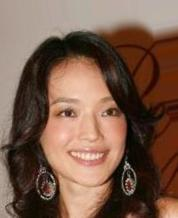

In [7]:
ImageDisplay(os.path.join(image_dir , df_blackHairFemale.iloc[0]['image_id']))

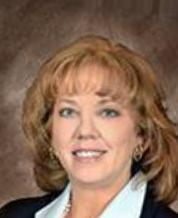

In [8]:
ImageDisplay(os.path.join(image_dir, df_blondHairFemale.iloc[0]['image_id']))

In [11]:
domainA , domainB = [] , []

for index, row in df_blackHairFemale.iterrows():
    domainA.append(row['image_id'])

for index, row in df_blondHairFemale.iterrows():
    domainB.append(row['image_id'])

In [12]:
A_train , A_test , = train_test_split(domainA , test_size = 0.01 , random_state = 53)
B_train , B_test , = train_test_split(domainB , test_size = 0.01 , random_state = 53)

In [17]:
A_train_dir = os.path.join(output_dir , 'train/A')
B_train_dir = os.path.join(output_dir , 'train/B')

os.makedirs(A_train_dir , exist_ok = True) # Creating locations.
os.makedirs(B_train_dir , exist_ok = True)

for imageA , imageB in zip(A_train , B_train):
    shutil.copy(os.path.join(image_dir,imageA) , os.path.join(A_train_dir , imageA))
    shutil.copy(os.path.join(image_dir,imageB) , os.path.join(B_train_dir , imageB))

A_test_dir = os.path.join(output_dir,'test/A')
B_test_dir = os.path.join(output_dir,'test/B')

os.makedirs(A_test_dir , exist_ok = True)
os.makedirs(B_test_dir , exist_ok = True)

for imageA , imageB in zip(A_test , B_test):
    shutil.copy(os.path.join(image_dir, imageA) , os.path.join(A_test_dir , imageA))
    shutil.copy(os.path.join(image_dir, imageB) , os.path.join(B_test_dir , imageB))

In [ ]:
# Done for now